In [6]:
import numpy as np
from ripser import Rips, ripser
import matplotlib.pyplot as plt
from get_hdmatrices import TARG

## Data Preprocessing

In [7]:
# params = {
#     "SAMPLES": 10,
#     "SIMULATIONS": 5,
#     "GROUPS": 1,
#     "SEGSITES": 100,
#     "FNAME": "sim_50_72.txt"
# }

params = {
    "SAMPLES": 100,
    "SIMULATIONS": 1,
    "GROUPS": 1,
    "SEGSITES": 1000,
    "FNAME": "sim_073024.txt"
}

targ = TARG(samples=params["SAMPLES"],
            simulations=params["SIMULATIONS"],
            groups=params["GROUPS"],
            segsites=params["SEGSITES"],
            maxdim=2)

# File Processing
# (SIMULATIONS, SAMPLES)
group = targ.get_sample_sequences(params["FNAME"])

# Hamming Distance Matrix Computation
# (SIMULATIONS, SAMPLES, SAMPLES)
hdmatrices = targ.get_hdmatrices(group)

# Add Stochasticity Computation
# (VARLIST, SIMULATIONS, SAMPLES, SAMPLES)
varlist = targ.add_stochasticity(hdmatrices)

In [8]:
# Get the HD matrix from the 1st simulation, where variance = 0.0
print(varlist[0][0])

[[  0. 199. 297. ... 210. 171. 200.]
 [199.   0. 184. ... 235. 222.   1.]
 [297. 184.   0. ... 149. 226. 185.]
 ...
 [210. 235. 149. ...   0. 137. 236.]
 [171. 222. 226. ... 137.   0. 223.]
 [200.   1. 185. ... 236. 223.   0.]]


## Topological Quantities


### Persistence Diagram

Homologies      contains a list of three entries
                each entry is a record of birth and death times
                of each homology group ($H_0, H_1, H_2$)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=True, n_perm = None, verbose=True)


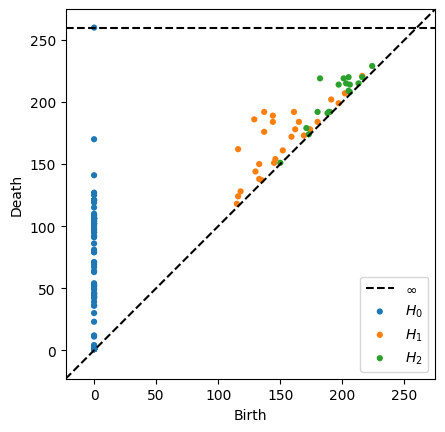

In [9]:
rips = Rips(maxdim=targ.MAXDIM, do_cocycles=True)

# Show the persistence diagram
homologies = []

# TODO: Fix to get all simulations, currently only gets the 1st simulation
# GOAL: homologies of dimension (VARLIST, SIMULATIONS, MAXDIM+1, X)
for v in varlist:
    homologies.append(rips.fit_transform(v[0], distance_matrix=True))

# For testing purposes only
hom = homologies[0]
rips.plot(hom, show=True)

In [10]:
# Compute Betti Numbers
betti_numbers = targ.get_betti_numbers(hom)

# Compute Barcode Lengths
barcode_lens = targ.get_barcode_lengths(hom)

# Compute Barcode Means and Variances
barcode_means, barcode_vars = targ.get_barcode_length_statistics(hom)

c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [11]:
print(f"BETTI NUMBERS: {betti_numbers}")
print(f"BARCODE LENGTHS: {barcode_lens}")
print(f"BARCODE LENGTH MEAN: {barcode_means}")
print(f"BARCODE LENGTH VARIANCE: {barcode_vars}")

BETTI NUMBERS: [85. 27. 18.]
BARCODE LENGTHS: [array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   3.,   3.,
         4.,   4.,  11.,  12.,  23.,  30.,  36.,  36.,  39.,  42.,  43.,
        43.,  44.,  45.,  46.,  46.,  49.,  50.,  52.,  52.,  53.,  54.,
        63.,  64.,  67.,  69.,  71.,  71.,  79.,  79.,  81.,  86.,  91.,
        92.,  95.,  95.,  97.,  98., 100., 102., 102., 102., 104., 104.,
       106., 106., 106., 106., 106., 107., 107., 109., 110., 115., 119.,
       121., 121., 121., 125., 127., 141., 170.,  inf]), array([ 3.,  8., 10.,  2.,  5., 14., 17.,  6.,  8.,  9., 46., 13.,  4.,
       39., 16.,  4., 19.,  4., 40., 57., 45., 31., 55.,  2., 11.,  5.,
        5.]), array([ 1.,  1.,  8.,  3., 12.,  3.,  2.,  2.,  4.,  8., 17.,  2., 12.,
       18., 37.,  4., 15.,  5.])]
BARCODE LENGTH MEAN: [np.float64(inf), np.float64(160.92592592592592), np.float64(198.66666666666666)]
BARCODE LENGTH VAR

### Barcode Ensemble Diagrams

c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step


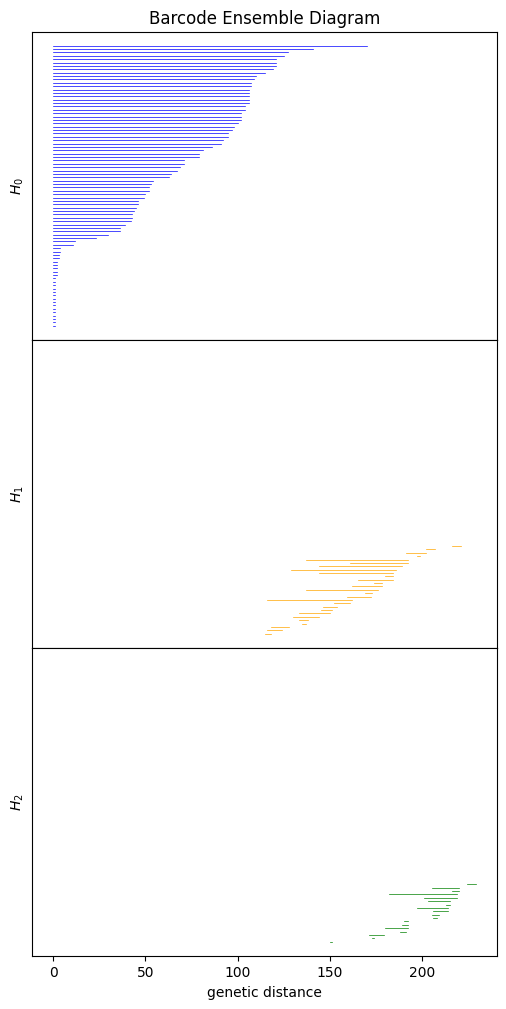

In [12]:
fig = plt.figure(figsize=(6,12))
gs = fig.add_gridspec(nrows=3,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

colors=['blue', 'orange', 'green']
labels=['$H_0$','$H_1$', '$H_2$']

for i in range(0, betti_numbers.shape[0]):
    axs[i].set_ylabel(labels[i])
    axs[i].get_yaxis().set_ticks([])
    axs[i].label_outer()

    len_h = round(betti_numbers[i])
    for j in range(0, len_h):
        axs[i].plot(np.linspace(hom[i][j][0], hom[i][j][1], 2), [j, j], c=colors[i], linewidth=0.5)
    
axs[0].set_title("Barcode Ensemble Diagram")
axs[-1].set_xlabel("genetic distance")
plt.show()

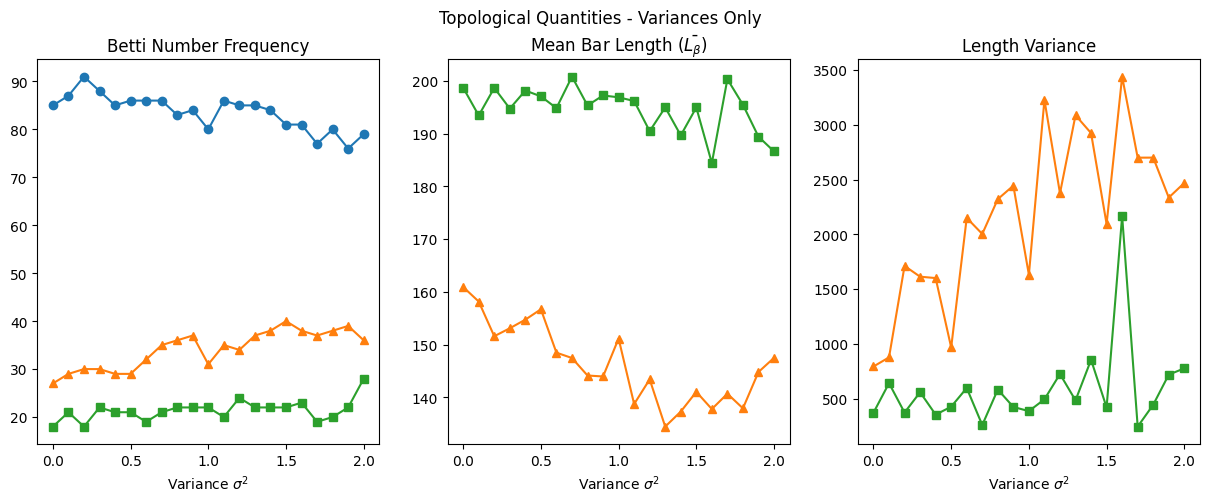

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Generate plot for Betti numbers of different variances
var_values = [round(x / 10, 2) for x in range(0,21)]
var_betti_numbers = np.empty((len(var_values), targ.MAXDIM + 1))
mean_barcode_lengths = np.empty((len(var_values),targ.MAXDIM + 1))
variance_barcode_lengths = np.empty((len(var_values), targ.MAXDIM + 1))

for i in range(0, len(var_values)):
    var_betti_numbers[i] = targ.get_betti_numbers(homologies[i])
    mean_barcode_lengths[i], variance_barcode_lengths[i] = targ.get_barcode_length_statistics(homologies[i])

# y1, y2, y3
var_betti_numbers = var_betti_numbers.T
mean_barcode_lengths = mean_barcode_lengths.T
variance_barcode_lengths = variance_barcode_lengths.T

fig.suptitle("Topological Quantities - Variances Only")

axs[0].plot(var_values, var_betti_numbers[0, :], label="Betti Number $\\beta_0$", marker="o")
axs[0].plot(var_values, var_betti_numbers[1, :], label="Betti Number $\\beta_1$", marker="^")
axs[0].plot(var_values, var_betti_numbers[2, :], label="Betti Number $\\beta_2$", marker="s")
axs[0].set_title("Betti Number Frequency")
axs[0].set(xlabel="Variance $\\sigma^2$")

axs[1].plot(var_values, mean_barcode_lengths[0, :], label="Mean Barcode Length $H_0$", marker="o")
axs[1].plot(var_values, mean_barcode_lengths[1, :], label="Mean Barcode Length $H_1$", marker="^")
axs[1].plot(var_values, mean_barcode_lengths[2, :], label="Mean Barcode Length $H_2$", marker="s")
axs[1].set_title("Mean Bar Length ($\\bar{L_\\beta}$)")
axs[1].set(xlabel="Variance $\\sigma^2$")

axs[2].plot(var_values, variance_barcode_lengths[0, :], label="Barcode Length Variance $H_0$", marker="o")
axs[2].plot(var_values, variance_barcode_lengths[1, :], label="Barcode Length Variance $H_1$", marker="^")
axs[2].plot(var_values, variance_barcode_lengths[2, :], label="Barcode Length Variance $H_2$", marker="s")
axs[2].set_title("Length Variance")
axs[2].set(xlabel="Variance $\\sigma^2$")

plt.show()

## With Sparsity

In [14]:
# (SIMULATIONS, SPARSITY, SAMPLES, SEGSITES)
sparse_group_samples = targ.sparsity_sampling(group)

In [15]:
sparsity_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sparse_hdmatrices = []

for i in range(0, len(sparsity_list)):
    targ.SAMPLES = int(targ.SAMPLES * sparsity_list[i])
    sparse_hdmatrices.append(targ.get_hdmatrices([sparse_group_samples[i]]))
    targ.SAMPLES = 100

In [16]:
sparse_homologies = []
for sp in sparse_hdmatrices:
    sparse_homologies.append(rips.fit_transform(sp[0], distance_matrix=True))

sp_hom = sparse_homologies[3]

In [17]:
sparse_betti_numbers = targ.get_betti_numbers(sp_hom)

# Compute Barcode Lengths
sparse_barcode_lens = targ.get_barcode_lengths(sp_hom)

# Compute Barcode Means and Variances
sparse_barcode_means, sparse_barcode_vars = targ.get_barcode_length_statistics(sp_hom)

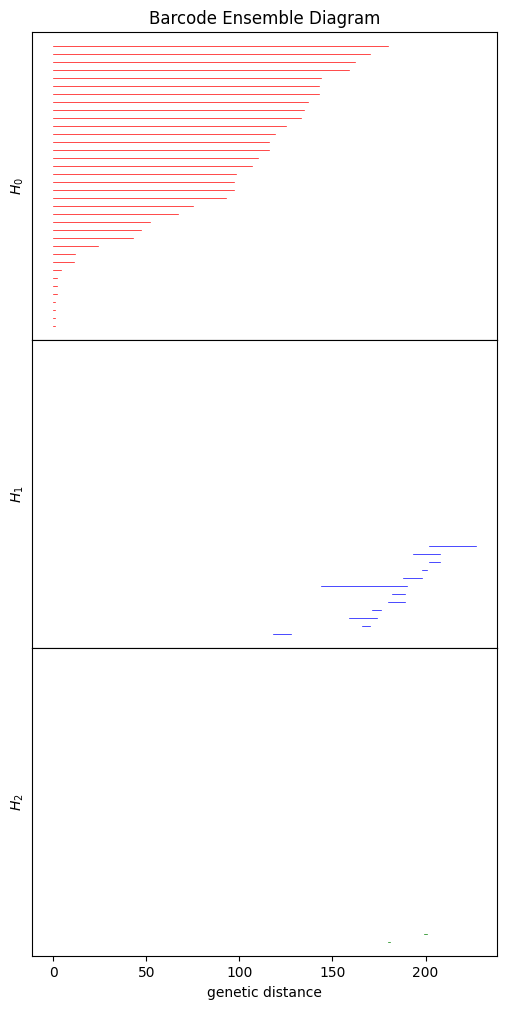

In [18]:
fig = plt.figure(figsize=(6,12))
gs = fig.add_gridspec(nrows=3,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

colors=['r', 'b', 'g']
labels=['$H_0$','$H_1$', '$H_2$']

for i in range(0, sparse_betti_numbers.shape[0]):
    axs[i].set_ylabel(labels[i])
    axs[i].get_yaxis().set_ticks([])
    axs[i].label_outer()

    len_h = round(sparse_betti_numbers[i])
    for j in range(0, len_h):
        axs[i].plot(np.linspace(sp_hom[i][j][0], sp_hom[i][j][1], 2), [j, j], c=colors[i], linewidth=0.5)
    
axs[0].set_title("Barcode Ensemble Diagram")
axs[-1].set_xlabel("genetic distance")
plt.show()

c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\AnacondaDestination\envs\targ\Lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


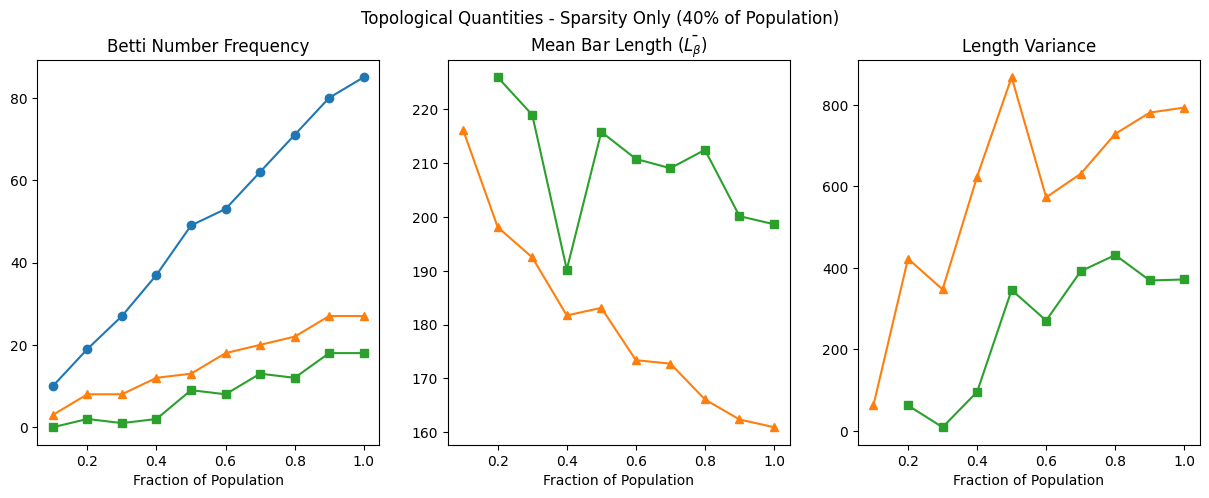

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Generate plot for Betti numbers of different variances
sparse_var_betti_numbers = np.empty((len(sparsity_list), targ.MAXDIM + 1))
sparse_mean_barcode_lengths = np.empty((len(sparsity_list),targ.MAXDIM + 1))
sparse_variance_barcode_lengths = np.empty((len(sparsity_list), targ.MAXDIM + 1))

for i in range(0, len(sparsity_list)):
    sparse_var_betti_numbers[i] = targ.get_betti_numbers(sparse_homologies[i])
    sparse_mean_barcode_lengths[i], sparse_variance_barcode_lengths[i] = targ.get_barcode_length_statistics(sparse_homologies[i])

# y1, y2, y3
sparse_var_betti_numbers = sparse_var_betti_numbers.T
sparse_mean_barcode_lengths = sparse_mean_barcode_lengths.T
sparse_variance_barcode_lengths = sparse_variance_barcode_lengths.T

fig.suptitle("Topological Quantities - Sparsity Only (40% of Population)")

axs[0].plot(sparsity_list, sparse_var_betti_numbers[0, :], label="Betti Number $\\beta_0$", marker="o")
axs[0].plot(sparsity_list, sparse_var_betti_numbers[1, :], label="Betti Number $\\beta_1$", marker="^")
axs[0].plot(sparsity_list, sparse_var_betti_numbers[2, :], label="Betti Number $\\beta_2$", marker="s")
axs[0].set_title("Betti Number Frequency")
axs[0].set(xlabel="Fraction of Population")

axs[1].plot(sparsity_list, sparse_mean_barcode_lengths[0, :], label="Mean Barcode Length $H_0$", marker="o")
axs[1].plot(sparsity_list, sparse_mean_barcode_lengths[1, :], label="Mean Barcode Length $H_1$", marker="^")
axs[1].plot(sparsity_list, sparse_mean_barcode_lengths[2, :], label="Mean Barcode Length $H_2$", marker="s")
axs[1].set_title("Mean Bar Length ($\\bar{L_\\beta}$)")
axs[1].set(xlabel="Fraction of Population")

axs[2].plot(sparsity_list, sparse_variance_barcode_lengths[0, :], label="Barcode Length Variance $H_0$", marker="o")
axs[2].plot(sparsity_list, sparse_variance_barcode_lengths[1, :], label="Barcode Length Variance $H_1$", marker="^")
axs[2].plot(sparsity_list, sparse_variance_barcode_lengths[2, :], label="Barcode Length Variance $H_2$", marker="s")
axs[2].set_title("Length Variance")
axs[2].set(xlabel="Fraction of Population")

plt.show()

In [20]:
sparse_variance_barcode_lengths

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [ 63.13888889, 422.734375  , 347.125     , 624.03993056,
        868.02514793, 573.18209877, 630.9875    , 728.99173554,
        781.15912209, 793.55006859],
       [         nan,  62.5       ,   9.        ,  95.6875    ,
        345.80555556, 270.90234375, 391.84023669, 431.66666667,
        369.25      , 371.61111111]])

## Cocycles

In [21]:
# Produces cocycles
result = ripser(varlist[0][0], maxdim=targ.MAXDIM, do_cocycles=True, distance_matrix=True)
"""
(some) Parameters of variable 'result':

"dgms" - diagrams; identical to the contents of homologies[0]
"dperm2all" - hamming distance matrix; identical to the HD matrix in varlist[0][0]
"cocycles" - cocycles; suprisingly not identical to the other set of cocycles in rips
"""
hd_mat = result["dperm2all"]
cocycles = result["cocycles"]
diagrams = result["dgms"]

# Is the cocycles of rips equal to the cocycles of result? Ans: False
print(np.array_equal(rips.cocycles_[2], result["cocycles"][2]))

False


In [28]:
cocycles[1]

[array([[95, 77,  1],
        [88, 77,  1],
        [77, 68,  1],
        [93, 77,  1]]),
 array([[78, 54,  1],
        [54, 11,  1]]),
 array([[87, 50,  1],
        [97, 87,  1],
        [87, 69,  1],
        [87, 25,  1],
        [87, 66,  1],
        [87, 32,  1],
        [87, 27,  1],
        [87, 23,  1]]),
 array([[61, 54,  1],
        [61, 29,  1]]),
 array([[70, 22,  1]]),
 array([[41, 27,  1],
        [41, 23,  1],
        [33, 27,  1],
        [33, 23,  1],
        [41,  5,  1],
        [33,  5,  1]]),
 array([[19,  6,  1]]),
 array([[84,  0,  1],
        [17,  0,  1],
        [ 9,  0,  1],
        [96,  0,  1],
        [96, 80,  1],
        [86,  0,  1],
        [31,  0,  1],
        [96,  7,  1],
        [98, 96,  1],
        [96, 72,  1]]),
 array([[92, 90,  1],
        [90, 49,  1],
        [90, 50,  1],
        [94, 90,  1],
        [94, 36,  1]]),
 array([[29, 13,  1],
        [29,  4,  1]]),
 array([[97, 56,  1],
        [56, 35,  1],
        [56, 25,  1],
        [97,

In [23]:
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], linewidth = 3)

def plotCocycle2D(D, X, cocycle, thresh):
    """
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    """
    #Plot all edges under the threshold
    N = X.shape[0]
    t = np.linspace(0, 1, 10)
    c = plt.get_cmap('Greys')
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]

    for i in range(N):
        for j in range(N):
            if D[i, j] <= thresh:
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
    #Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        [i, j, val] = cocycle[k, :]
        if D[i, j] <= thresh:
            [i, j] = [min(i, j), max(i, j)]
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b')
    #Plot vertex labels
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r')
    plt.axis('equal')

In [24]:
from persim import plot_diagrams

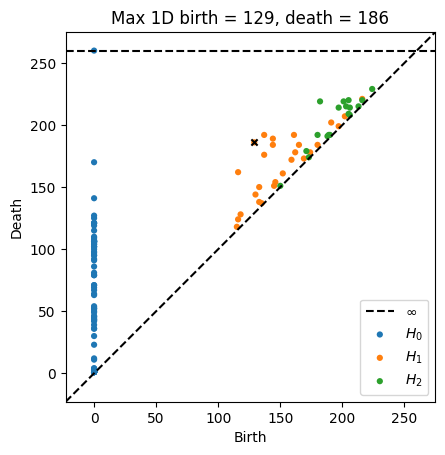

In [25]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

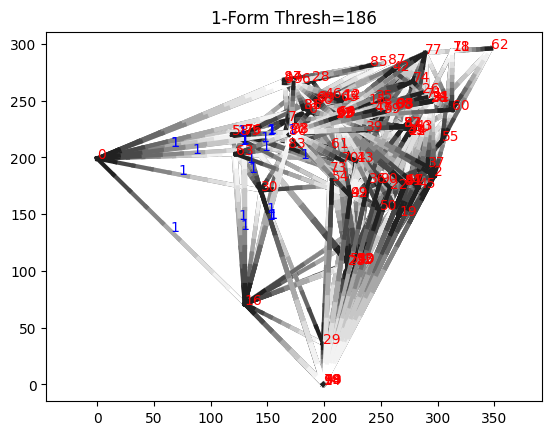

In [26]:
cocycle = cocycles[1][idx]
thresh = dgm1[idx, 1] #Project cocycle onto edges less than or equal to death time

# Plot the hamming distance...twice???
plotCocycle2D(hd_mat, varlist[0][0], cocycle, thresh)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()